## TIME SERIES GRAPH PLOTTING 

In [27]:
X = np.array(df_final.drop(['label'], axis=1))
y = np.array(df_final['label'])


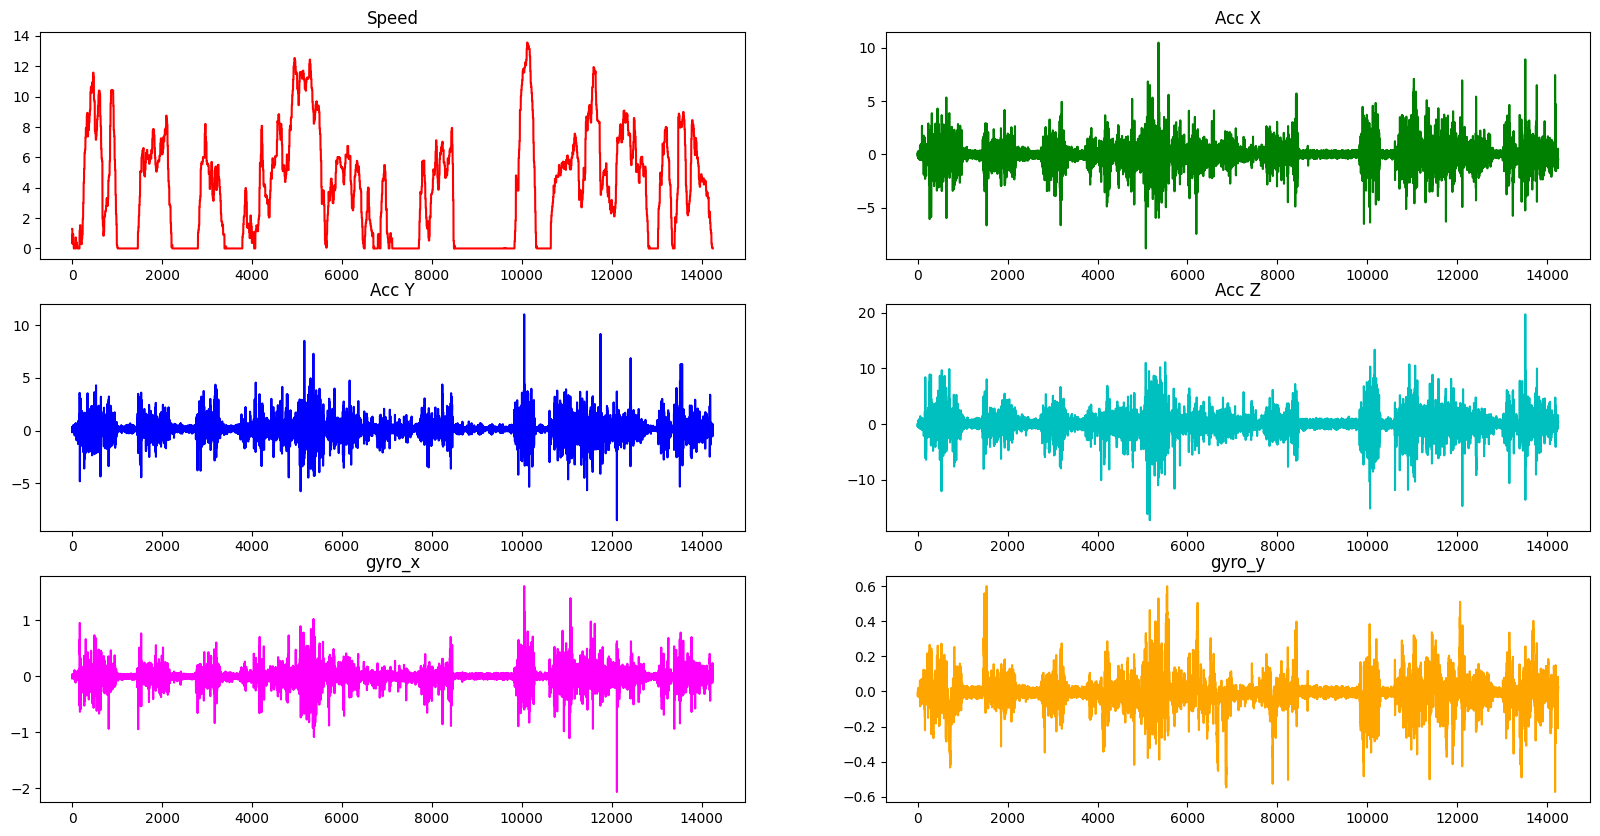

In [28]:
def plot_series(data, df_final_col_names):
    colors = ['r', 'g', 'b', 'c', 'magenta', 'orange', 'black']
    
    
    fig, axes = plt.subplots(data.shape[1] // 2, 2, figsize=(20, 10))
    
    try:
        for i in range(data.shape[1] // 2):
            for j in range (2):
                n = i * 2 + j
    
                axes[i][j].plot(np.arange(len(data[:, n])),data[:,n], color=colors[n])
                axes[i][j].set_title(df_final_col_names[n])
    except IndexError:
        print('Error!')

plot_series(X, df_final.columns)        


In [1]:
import time
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generate a synthetic dataset for anomaly detection
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_clusters_per_class=1, weights=[0.95], 
                           flip_y=0, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Mapping actual class labels (0 and 1) to anomaly detection labels (-1 for anomaly, 1 for normal)
y_train = np.where(y_train == 0, 1, -1)
y_test = np.where(y_test == 0, 1, -1)

# Define max_samples values to test
max_samples_values = [0.5, 0.75, 1.0]

# Initialize a dictionary to store the results
results = {}

for max_samples in max_samples_values:
    # Record the start time
    start_time = time.time()
    
    # Train Isolation Forest with the current max_samples setting
    model = IsolationForest(max_samples=max_samples, contamination=0.05, random_state=42)
    model.fit(X_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Convert prediction labels back to binary (1 for normal, 0 for anomaly)
    y_pred_binary = np.where(y_pred == 1, 0, 1)
    y_test_binary = np.where(y_test == 1, 0, 1)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test_binary, y_pred_binary)
    precision = precision_score(y_test_binary, y_pred_binary)
    recall = recall_score(y_test_binary, y_pred_binary)
    
    # Record the end time and calculate runtime
    end_time = time.time()
    runtime = end_time - start_time
    
    # Store the results
    results[max_samples] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'Runtime (s)': runtime
    }

# Display the results
print("Evaluation of Isolation Forest with Different max_samples Values")
print("--------------------------------------------------------------")
for max_samples, metrics in results.items():
    print(f"max_samples = {max_samples}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print()


Evaluation of Isolation Forest with Different max_samples Values
--------------------------------------------------------------
max_samples = 0.5
  Accuracy: 0.9700
  Precision: 0.5455
  Recall: 0.6000
  Runtime (s): 0.3723

max_samples = 0.75
  Accuracy: 0.9733
  Precision: 0.6000
  Recall: 0.6000
  Runtime (s): 0.3707

max_samples = 1.0
  Accuracy: 0.9767
  Precision: 0.6667
  Recall: 0.6000
  Runtime (s): 0.3523

